In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl

%matplotlib inline

In [2]:
GH = pd.read_csv('../GH 2016 RAW.csv')

In [3]:
GH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 48 columns):
WEEK                             366 non-null int64
DATE                             366 non-null object
WEEKDAY                          366 non-null object
WEEKDAY_NUM                      366 non-null int64
INDOOR DLI (BASIL NURSERY)       125 non-null float64
INDOOR DLI                       366 non-null int64
CO2 DATE                         366 non-null object
CO2                              238 non-null float64
TEMP DATE                        366 non-null object
TEMP                             132 non-null float64
AVG_WEEK                         52 non-null float64
AVG_DATE                         52 non-null object
WEEKLY INDOOR DLI SUM mmol/m2    52 non-null float64
24 HR AV TEMP C                  52 non-null float64
24 AVG TEMP F                    52 non-null float64
AVERAGE CO2                      52 non-null float64
RH%                              52 non-null obj

In [5]:
GH.describe()

,WEEK,WEEKDAY_NUM,INDOOR DLI (BASIL NURSERY),INDOOR DLI,CO2,TEMP,AVG_WEEK,WEEKLY INDOOR DLI SUM mmol/m2,24 HR AV TEMP C,24 AVG TEMP F,...,FNGOAKRHEDNYC,FNGTROPHEDNYC,FNGBTHDBBYNYC,FNGASIALOSNYC,FNGBASLWHLNYC,FNGUGLY012NYC,FNGENDSLOSNYC,FNGROMN045NYC,FNGROMNLOSNYC,Unnamed: 47
count,366.000000,366.000000,125.000000,366.000000,238.000000,132.000000,52.000000,52.000000,52.000000,52.000000,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,76.000000,0.0,0.0
mean,26.213115,4.008197,17355.728000,14973.773224,513.067227,20.857576,26.500000,56713.194708,21.019231,69.834615,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,64.227237,NaN,NaN
std,15.117565,2.000668,3509.310054,6124.992614,28.852376,2.088029,15.154757,46956.061011,2.537564,4.567615,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,32.805894,NaN,NaN
min,0.000000,1.000000,3570.000000,1768.000000,461.000000,17.500000,1.000000,0.000000,17.100000,62.780000,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,NaN
25%,13.000000,2.000000,16525.000000,10671.750000,490.000000,19.175000,13.750000,2.916730,18.875000,65.975000,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,39.047500,NaN,NaN
50%,26.000000,4.000000,17745.000000,14492.000000,512.000000,20.800000,26.500000,68793.000000,20.800000,69.440000,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,52.920000,NaN,NaN
75%,39.000000,6.000000,18778.000000,18208.000000,535.000000,21.800000,39.250000,93841.750000,22.100000,71.780000,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,84.972500,NaN,NaN
max,52.000000,7.000000,25589.000000,30856.000000,598.000000,27.800000,52.000000,144022.000000,27.300000,81.140000,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,159.780000,NaN,NaN


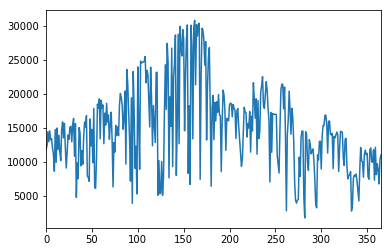

In [7]:
GH['INDOOR DLI'].plot()

In [8]:
GH.corr()

,WEEK,WEEKDAY_NUM,INDOOR DLI (BASIL NURSERY),INDOOR DLI,CO2,TEMP,AVG_WEEK,WEEKLY INDOOR DLI SUM mmol/m2,24 HR AV TEMP C,24 AVG TEMP F,...,FNGOAKRHEDNYC,FNGTROPHEDNYC,FNGBTHDBBYNYC,FNGASIALOSNYC,FNGBASLWHLNYC,FNGUGLY012NYC,FNGENDSLOSNYC,FNGROMN045NYC,FNGROMNLOSNYC,Unnamed: 47
WEEK,1.000000,-0.021255,-0.137651,-0.216923,0.259154,-0.256803,1.000000,0.152241,0.257640,0.257640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.090738,NaN,NaN
WEEKDAY_NUM,-0.021255,1.000000,0.080034,-0.013243,-0.110034,-0.026582,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.045734,NaN,NaN
INDOOR DLI (BASIL NURSERY),-0.137651,0.080034,1.000000,0.440883,NaN,NaN,-0.133572,0.027406,0.164534,0.164534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INDOOR DLI,-0.216923,-0.013243,0.440883,1.000000,-0.271741,0.288992,-0.124098,-0.226626,0.259662,0.259662,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.089782,NaN,NaN
CO2,0.259154,-0.110034,NaN,-0.271741,1.000000,-0.462265,0.417981,-0.185643,-0.537898,-0.537898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.321224,NaN,NaN
TEMP,-0.256803,-0.026582,NaN,0.288992,-0.462265,1.000000,-0.313932,0.275612,0.835000,0.835000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.321961,NaN,NaN
AVG_WEEK,1.000000,NaN,-0.133572,-0.124098,0.417981,-0.313932,1.000000,0.152241,0.257640,0.257640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.234648,NaN,NaN
WEEKLY INDOOR DLI SUM mmol/m2,0.152241,NaN,0.027406,-0.226626,-0.185643,0.275612,0.152241,1.000000,0.074520,0.074520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.108248,NaN,NaN
24 HR AV TEMP C,0.257640,NaN,0.164534,0.259662,-0.537898,0.835000,0.257640,0.074520,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.428449,NaN,NaN
24 AVG TEMP F,0.257640,NaN,0.164534,0.259662,-0.537898,0.835000,0.257640,0.074520,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.428449,NaN,NaN


In [16]:
new_gh = GH.fillna(method = 'bfill')

In [17]:
new_gh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 48 columns):
WEEK                             366 non-null int64
DATE                             366 non-null object
WEEKDAY                          366 non-null object
WEEKDAY_NUM                      366 non-null int64
INDOOR DLI (BASIL NURSERY)       125 non-null float64
INDOOR DLI                       366 non-null int64
CO2 DATE                         366 non-null object
CO2                              366 non-null float64
TEMP DATE                        366 non-null object
TEMP                             366 non-null float64
AVG_WEEK                         361 non-null float64
AVG_DATE                         361 non-null object
WEEKLY INDOOR DLI SUM mmol/m2    361 non-null float64
24 HR AV TEMP C                  361 non-null float64
24 AVG TEMP F                    361 non-null float64
AVERAGE CO2                      361 non-null float64
RH%                              361 non-n

In [21]:
new_gh.corr()

,WEEK,WEEKDAY_NUM,INDOOR DLI (BASIL NURSERY),INDOOR DLI,CO2,TEMP,AVG_WEEK,WEEKLY INDOOR DLI SUM mmol/m2,24 HR AV TEMP C,24 AVG TEMP F,...,FNGOAKRHEDNYC,FNGTROPHEDNYC,FNGBTHDBBYNYC,FNGASIALOSNYC,FNGBASLWHLNYC,FNGUGLY012NYC,FNGENDSLOSNYC,FNGROMN045NYC,FNGROMNLOSNYC,Unnamed: 47
WEEK,1.000000,-0.021255,-1.376507e-01,-0.216923,-0.339339,-5.573499e-01,0.999722,0.163433,0.245919,0.245919,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.829000e-01,NaN,NaN
WEEKDAY_NUM,-0.021255,1.000000,8.003425e-02,-0.013243,-0.071204,-5.330099e-03,-0.007158,0.002635,-0.004694,-0.004694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.242676e-02,NaN,NaN
INDOOR DLI (BASIL NURSERY),-0.137651,0.080034,1.000000e+00,0.440883,NaN,-3.641541e-16,-0.135181,0.024757,0.083430,0.083430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.453386e-16,NaN,NaN
INDOOR DLI,-0.216923,-0.013243,4.408825e-01,1.000000,-0.223568,3.235071e-01,-0.199651,-0.335234,0.169944,0.169944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.131606e-01,NaN,NaN
CO2,-0.339339,-0.071204,NaN,-0.223568,1.000000,-1.326935e-01,-0.356498,-0.176667,-0.634579,-0.634579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.607531e-02,NaN,NaN
TEMP,-0.557350,-0.005330,-3.641541e-16,0.323507,-0.132694,1.000000e+00,-0.566073,-0.167988,0.242505,0.242505,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.609705e-01,NaN,NaN
AVG_WEEK,0.999722,-0.007158,-1.351809e-01,-0.199651,-0.356498,-5.660732e-01,1.000000,0.163405,0.246044,0.246044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.969572e-01,NaN,NaN
WEEKLY INDOOR DLI SUM mmol/m2,0.163433,0.002635,2.475703e-02,-0.335234,-0.176667,-1.679884e-01,0.163405,1.000000,0.080970,0.080970,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.860333e-01,NaN,NaN
24 HR AV TEMP C,0.245919,-0.004694,8.343027e-02,0.169944,-0.634579,2.425053e-01,0.246044,0.080970,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.024063e-02,NaN,NaN
24 AVG TEMP F,0.245919,-0.004694,8.343027e-02,0.169944,-0.634579,2.425053e-01,0.246044,0.080970,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.024063e-02,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 48 columns):
WEEK                             0 non-null int64
DATE                             0 non-null object
WEEKDAY                          0 non-null object
WEEKDAY_NUM                      0 non-null int64
INDOOR DLI (BASIL NURSERY)       0 non-null float64
INDOOR DLI                       0 non-null int64
CO2 DATE                         0 non-null object
CO2                              0 non-null float64
TEMP DATE                        0 non-null object
TEMP                             0 non-null float64
AVG_WEEK                         0 non-null float64
AVG_DATE                         0 non-null object
WEEKLY INDOOR DLI SUM mmol/m2    0 non-null float64
24 HR AV TEMP C                  0 non-null float64
24 AVG TEMP F                    0 non-null float64
AVERAGE CO2                      0 non-null float64
RH%                              0 non-null object
DATE.1                           0 

In [22]:
GH.head()

,WEEK,DATE,WEEKDAY,WEEKDAY_NUM,INDOOR DLI (BASIL NURSERY),INDOOR DLI,CO2 DATE,CO2,TEMP DATE,TEMP,...,FNGOAKRHEDNYC,FNGTROPHEDNYC,FNGBTHDBBYNYC,FNGASIALOSNYC,FNGBASLWHLNYC,FNGUGLY012NYC,FNGENDSLOSNYC,FNGROMN045NYC,FNGROMNLOSNYC,Unnamed: 47
0,0,1/1/2016,Friday,5,17248.0,11858,1/1/2016,NaN,1/1/16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1/2/2016,Saturday,6,17735.0,12388,1/2/2016,NaN,1/2/16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1/3/2016,Sunday,7,17848.0,14454,1/3/2016,NaN,1/3/16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1/4/2016,Monday,1,17491.0,12963,1/4/2016,NaN,1/4/16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1/5/2016,Tuesday,2,17531.0,14585,1/5/2016,NaN,1/5/16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
